# Correlação entre Variáveis

Nesta aula, vamos estudar como medir a relação entre duas variáveis numéricas usando:

- **Correlação de Pearson** (linear)
- **Correlação de Spearman** (monotônica)
- **Gráfico de dispersão**


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# Gerar dados simulados
np.random.seed(42)
idade = np.random.randint(18, 60, 50)
altura = 1.50 + (idade * 0.005) + np.random.normal(0, 0.05, 50)  # leve relação com idade

df = pd.DataFrame({
    "Idade": idade,
    "Altura": altura
})

df.head()


,Idade,Altura
0,56,1.720342
1,46,1.709547
2,32,1.637663
3,25,1.701212
4,38,1.706150


## Correlação de Pearson

Mede a **força da relação linear** entre duas variáveis.  
O coeficiente varia de -1 a 1:

- +1 = correlação positiva perfeita
-  0 = sem correlação linear
- -1 = correlação negativa perfeita


In [5]:
pearson_corr, _ = pearsonr(df["Idade"], df["Altura"])
print(f"Coeficiente de Correlação de Pearson: {pearson_corr:.4f}")


Coeficiente de Correlação de Pearson: 0.7254


## Correlação de Spearman

Avalia se existe uma **relação monotônica** (crescente ou decrescente) entre as variáveis.  
Não depende de linearidade nem distribuição normal.


In [6]:
spearman_corr, _ = spearmanr(df["Idade"], df["Altura"])
print(f"Coeficiente de Correlação de Spearman: {spearman_corr:.4f}")


Coeficiente de Correlação de Spearman: 0.7052


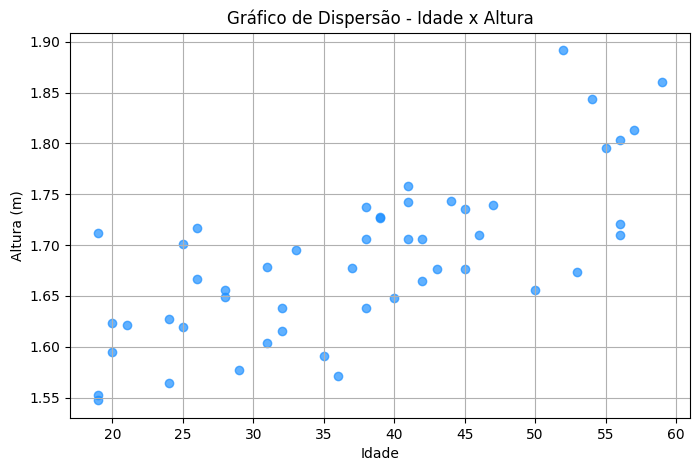

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(df["Idade"], df["Altura"], color='dodgerblue', alpha=0.7)
plt.title("Gráfico de Dispersão - Idade x Altura")
plt.xlabel("Idade")
plt.ylabel("Altura (m)")
plt.grid(True)
plt.show()


## Conclusão

- A **correlação de Pearson** é ideal para relações lineares entre variáveis numéricas.
- A **correlação de Spearman** é mais robusta para dados não-lineares ou com outliers.
- O **gráfico de dispersão** ajuda a visualizar visualmente o tipo de relação existente.


# Correlação entre Variáveis com Pandas

Nesta aula, vamos aprender a:

- Calcular correlações entre **todas as variáveis**
- Calcular correlação entre **variáveis específicas**
- Especificar o método de correlação: `pearson` (padrão) ou `spearman`


In [8]:
import pandas as pd

# Exemplo de dados
dados = {
    "Idade": [25, 32, 47, 19, 52, 32, 60, 30, 29, 35],
    "Altura": [1.72, 1.85, 1.68, 1.90, 1.75, 1.85, 1.79, 1.73, 1.70, 1.81],
    "Peso": [68, 75, 72, 85, 77, 76, 79, 70, 69, 73]
}

df = pd.DataFrame(dados)
df


,Idade,Altura,Peso
0,25,1.72,68
1,32,1.85,75
2,47,1.68,72
3,19,1.90,85
4,52,1.75,77
5,32,1.85,76
6,60,1.79,79
7,30,1.73,70
8,29,1.70,69
9,35,1.81,73


## Correlação entre todas as variáveis

Usando `df.corr()`, o Pandas calcula a correlação entre todas as variáveis numéricas do DataFrame.

Por padrão, é usado o método de **Pearson**.


In [9]:
df.corr()


,Idade,Altura,Peso
Idade,1.000000,-0.288675,0.121676
Altura,-0.288675,1.000000,0.769164
Peso,0.121676,0.769164,1.000000


## Correlação entre duas variáveis específicas

Podemos selecionar duas colunas e usar `.corr(method=...)` para calcular a correlação entre elas:

- Pearson → `df[["A", "B"]].corr(method="pearson")`
- Spearman → `df[["A", "B"]].corr(method="spearman")`


In [10]:
# Pearson entre Idade e Peso
print("Correlação Pearson:")
print(df[["Idade", "Peso"]].corr(method="pearson"))

# Spearman entre Idade e Peso
print("\nCorrelação Spearman:")
print(df[["Idade", "Peso"]].corr(method="spearman"))


Correlação Pearson:
          Idade      Peso
Idade  1.000000  0.121676
Peso   0.121676  1.000000

Correlação Spearman:
          Idade      Peso
Idade  1.000000  0.340427
Peso   0.340427  1.000000


## Conclusão

- O método `.corr()` é útil para obter rapidamente a matriz de correlação.
- Podemos especificar o tipo de correlação (`pearson`, `spearman`, `kendall`) conforme o tipo de dado.
- É possível analisar variáveis específicas isoladamente, o que é útil para **seleção de atributos** em projetos de Machine Learning.
